<a href="https://colab.research.google.com/github/rehann888/MachineLearning1/blob/main/CAR_Price_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**

In this project, I will predict car prices using descriptive and predictive analytical methods with several available independent variables. the modeling that I will use today will be of great benefit to the management team because with this, they can manipulate the car design, business strategy, etc., to meet a certain price level. Furthermore, the model will be a good way for management to understand the pricing dynamics of new markets.


1. **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

import xgboost as xgb



2. **Exploratory Data Analysis**

In [2]:
df = pd.read_csv("data_car.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [4]:
df.shape

(11914, 16)

In [5]:
df = df.drop(df.head(len(df)-1200).index)

In [6]:
df.shape

(1200, 16)

In [7]:
df = df.drop (['Market Category','Number of Doors'], axis=1)
df.head (5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
10714,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Midsize,Passenger Van,19,14,5657,34620
10715,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Midsize,Passenger Van,19,14,5657,38270
10716,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Midsize,Passenger Van,19,14,5657,33325
10717,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Large,Passenger Van,19,14,5657,38285
10718,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Midsize,Passenger Van,19,14,5657,33175


In [8]:
df.index

RangeIndex(start=10714, stop=11914, step=1)

In [9]:
df.index = range(1, len(df) + 1)

In [10]:
df.index

RangeIndex(start=1, stop=1201, step=1)

In [11]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Midsize,Passenger Van,19,14,5657,34620
2,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Midsize,Passenger Van,19,14,5657,38270
3,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Midsize,Passenger Van,19,14,5657,33325
4,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Large,Passenger Van,19,14,5657,38285
5,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Midsize,Passenger Van,19,14,5657,33175


In [12]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [13]:
df.shape

(1200, 14)

3. **Check Duplicat and Missing Value**

In [14]:
duplicated_raws = df[df.duplicated()]
duplicated_raws.shape

(59, 14)

In [15]:
df = df.drop_duplicates()
df.count()

Make                 1141
Model                1141
Year                 1141
Engine Fuel Type     1138
Engine HP            1141
Engine Cylinders     1141
Transmission Type    1141
Driven_Wheels        1141
Vehicle Size         1141
Vehicle Style        1141
highway MPG          1141
city mpg             1141
Popularity           1141
MSRP                 1141
dtype: int64

In [16]:
print("number after drop duplicated raws is: ", df.shape)

number after drop duplicated raws is:  (1141, 14)


In [17]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [18]:
df = df.dropna()
df.count()

Make                 1138
Model                1138
Year                 1138
Engine Fuel Type     1138
Engine HP            1138
Engine Cylinders     1138
Transmission Type    1138
Driven_Wheels        1138
Vehicle Size         1138
Vehicle Style        1138
highway MPG          1138
city mpg             1138
Popularity           1138
MSRP                 1138
dtype: int64

4. **Rename Column**

In [19]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive_Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive_Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
1,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Midsize,Passenger Van,19,14,5657,34620
2,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Midsize,Passenger Van,19,14,5657,38270
3,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Midsize,Passenger Van,19,14,5657,33325
4,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Large,Passenger Van,19,14,5657,38285
5,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Midsize,Passenger Van,19,14,5657,33175


In [20]:
df.columns=df.columns.str.lower().str.replace(" ","_")
df.head()

,make,model,year,engine_fuel_type,hp,cylinders,transmission,drive_mode,vehicle_size,vehicle_style,mpg-h,mpg-c,popularity,price
1,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Midsize,Passenger Van,19,14,5657,34620
2,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Midsize,Passenger Van,19,14,5657,38270
3,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Midsize,Passenger Van,19,14,5657,33325
4,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Large,Passenger Van,19,14,5657,38285
5,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Midsize,Passenger Van,19,14,5657,33175


5. **Dataset Visualisation**

In [21]:
df_categorical=df.select_dtypes(['object'])
df_categorical.head(3)

,make,model,engine_fuel_type,transmission,drive_mode,vehicle_size,vehicle_style
1,Ford,Transit Wagon,flex-fuel (unleaded/E85),AUTOMATIC,rear wheel drive,Midsize,Passenger Van
2,Ford,Transit Wagon,flex-fuel (unleaded/E85),AUTOMATIC,rear wheel drive,Midsize,Passenger Van
3,Ford,Transit Wagon,flex-fuel (unleaded/E85),AUTOMATIC,rear wheel drive,Midsize,Passenger Van


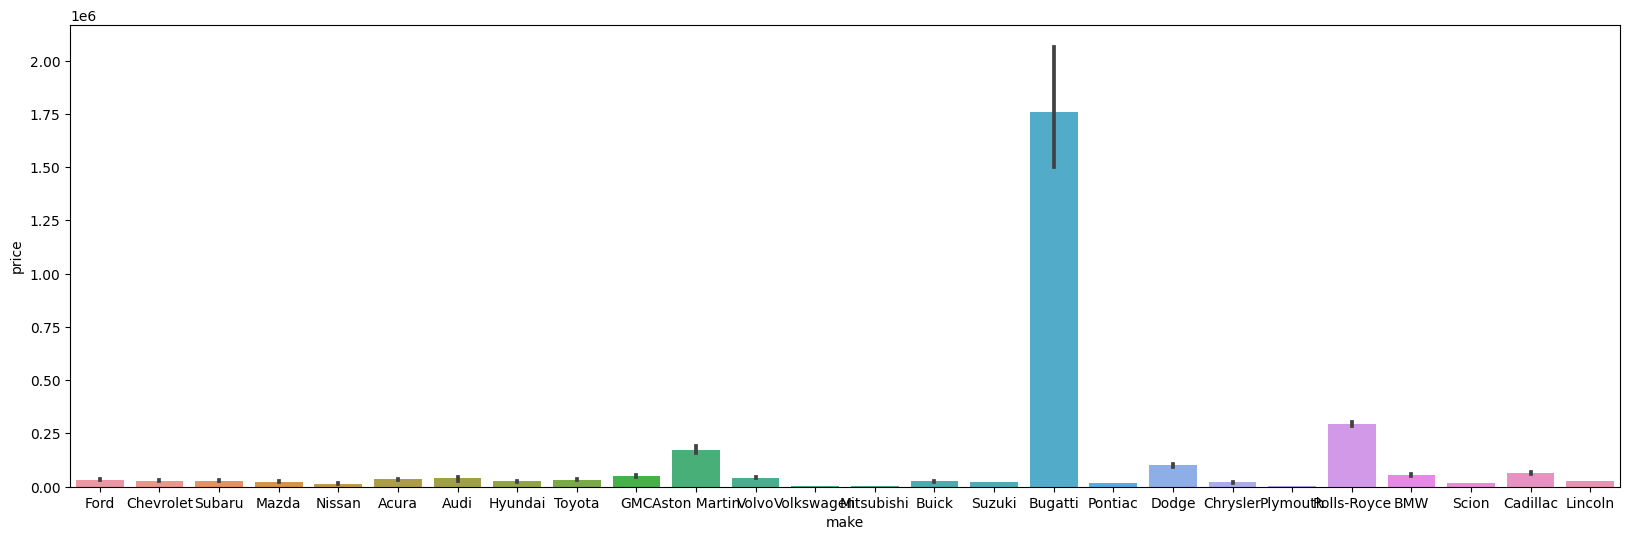

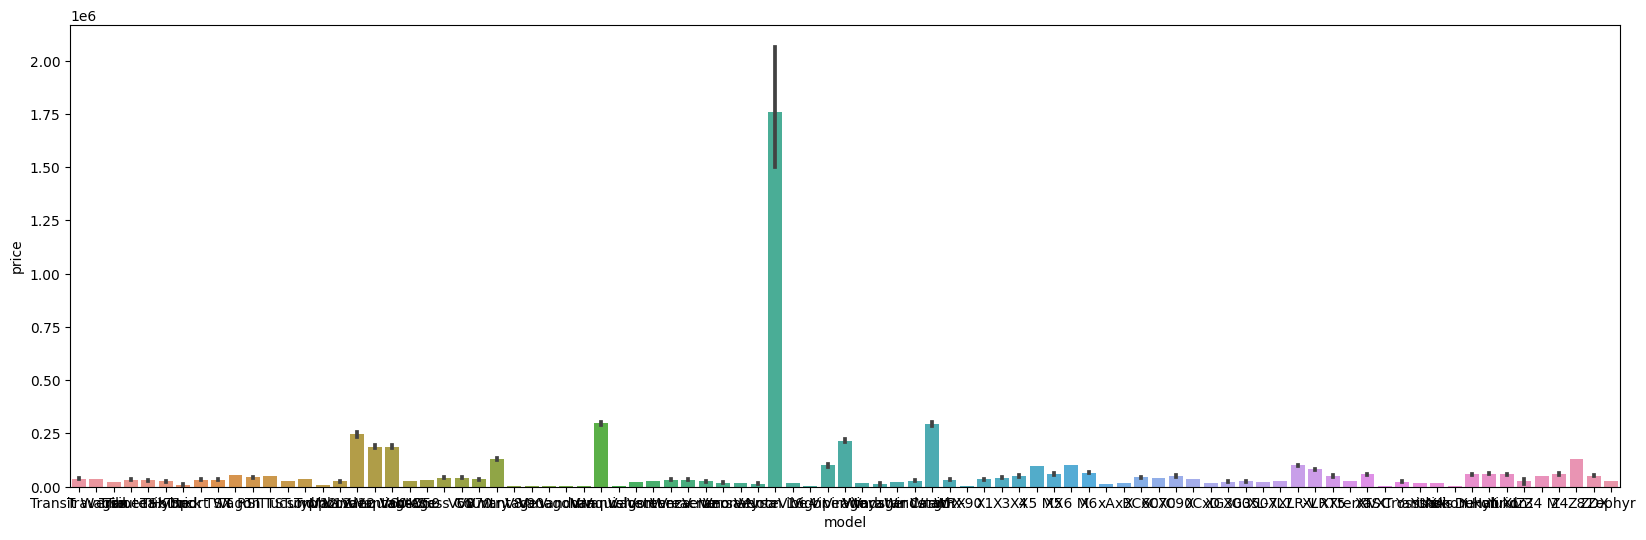

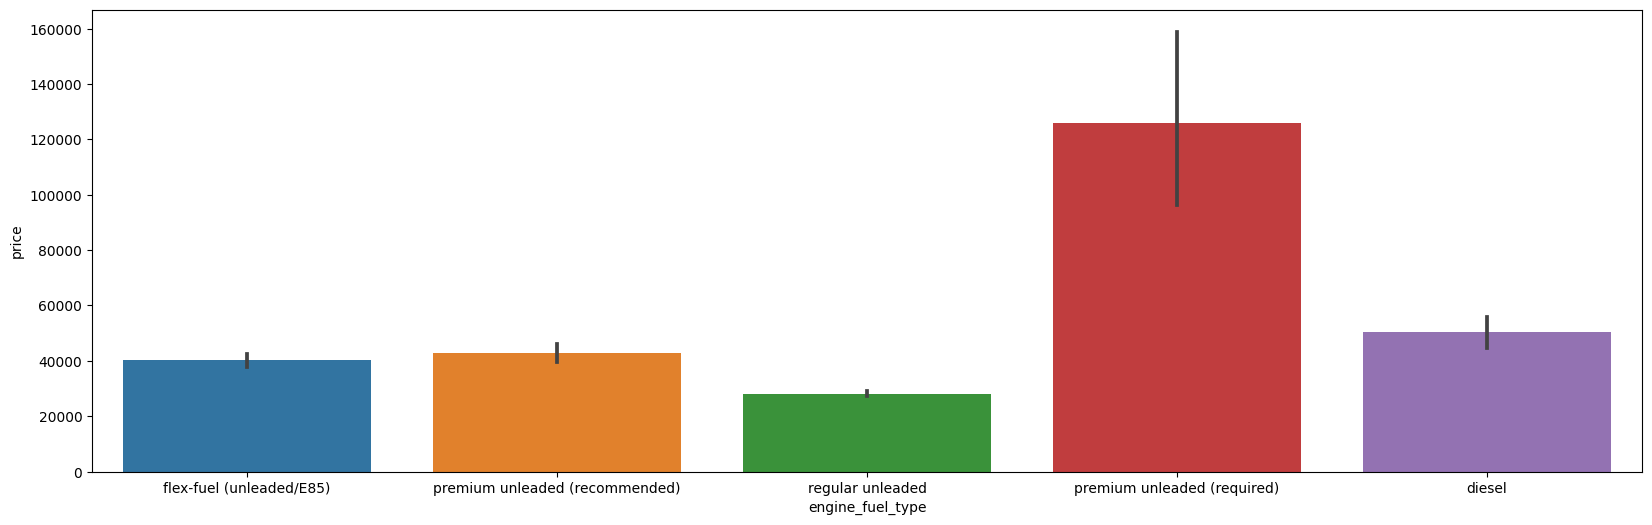

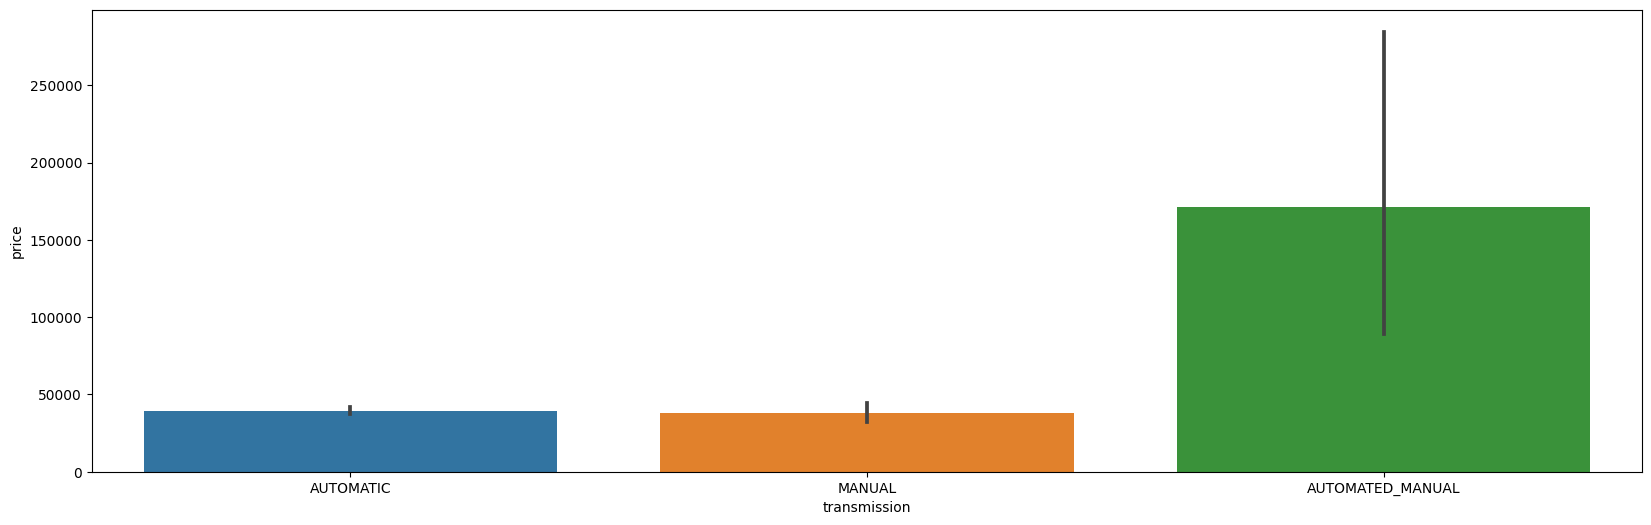

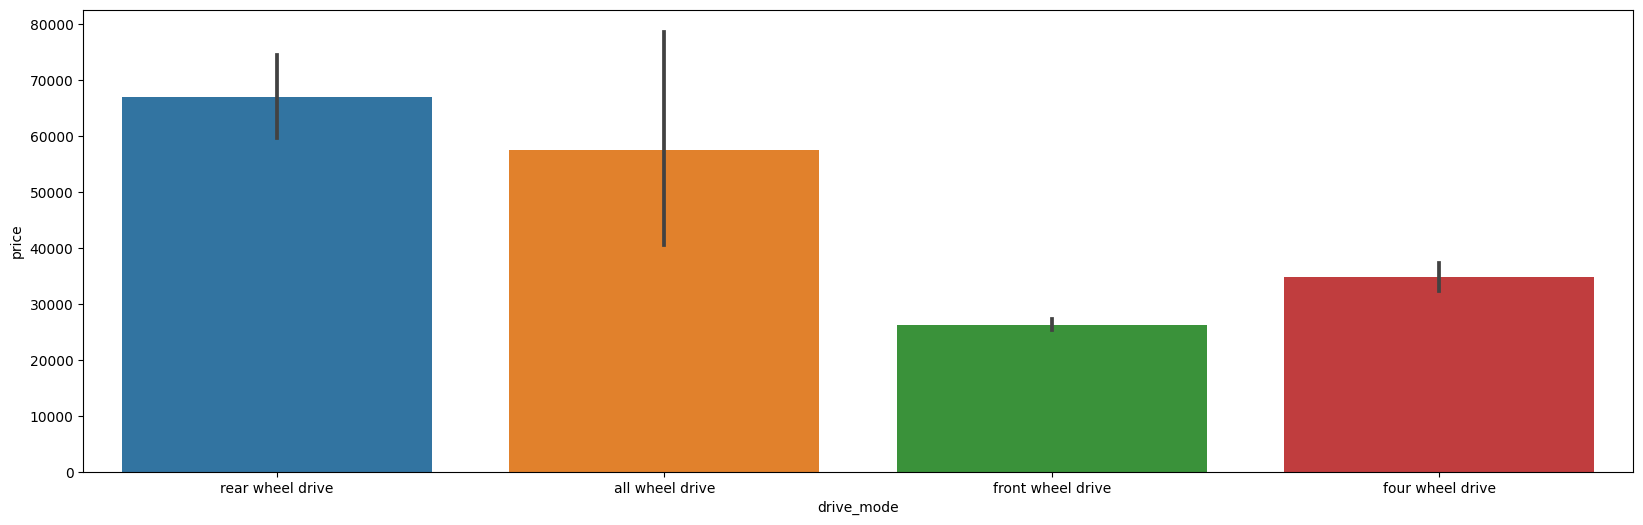

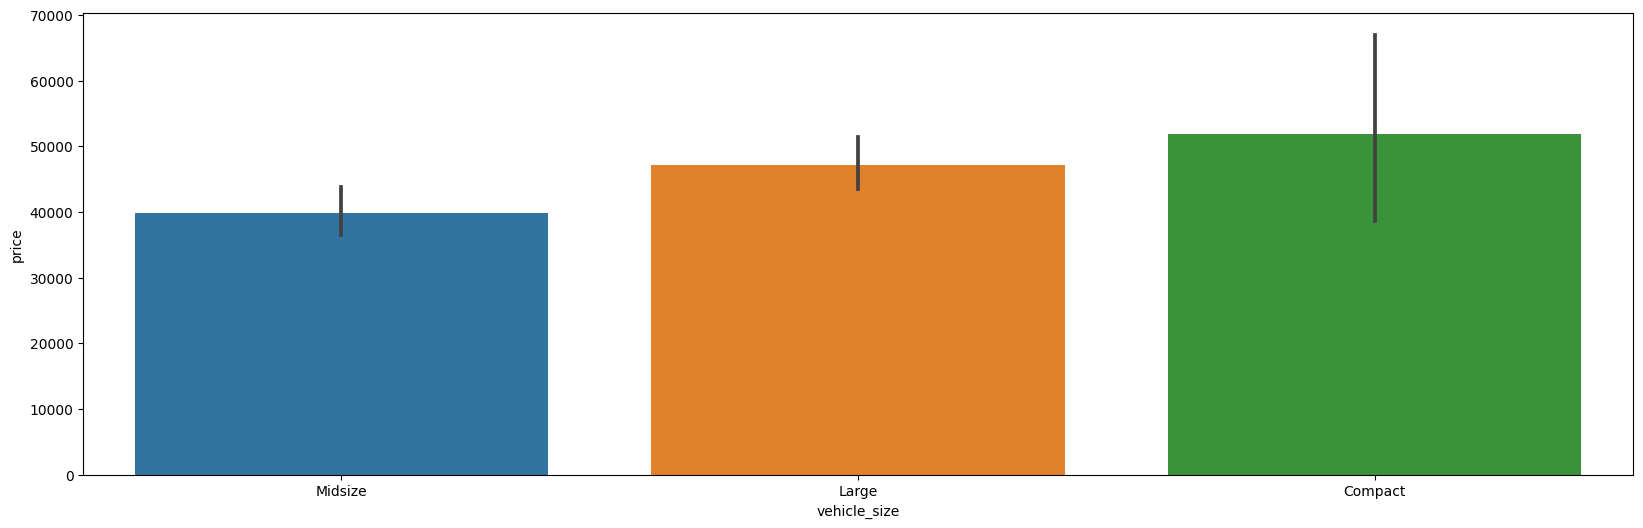

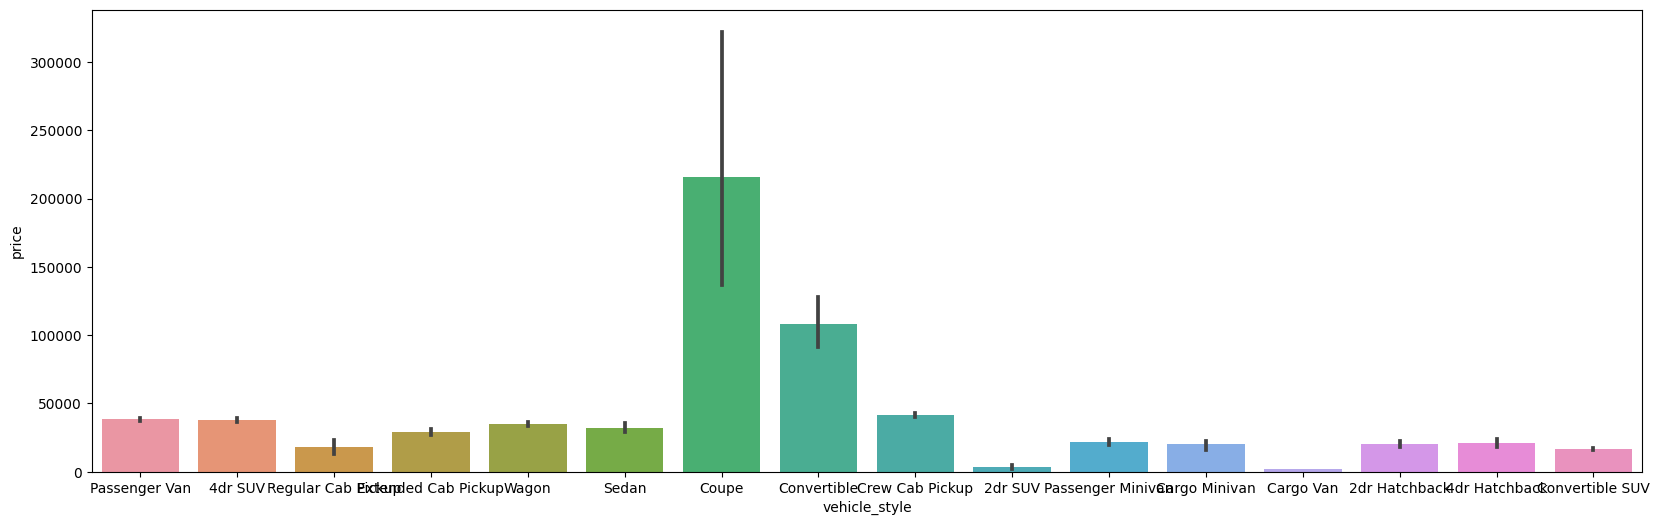

In [22]:
for col in df_categorical:
    plt.figure(figsize=(20,6))
    sns.barplot(x=df[col],y=df['price'])

In [23]:
df_numerical=df.select_dtypes(['int','float'])
df_numerical.head(3)

,year,hp,cylinders,mpg-h,mpg-c,popularity,price
1,2016,275.0,6.0,19,14,5657,34620
2,2016,275.0,6.0,19,14,5657,38270
3,2016,275.0,6.0,19,14,5657,33325


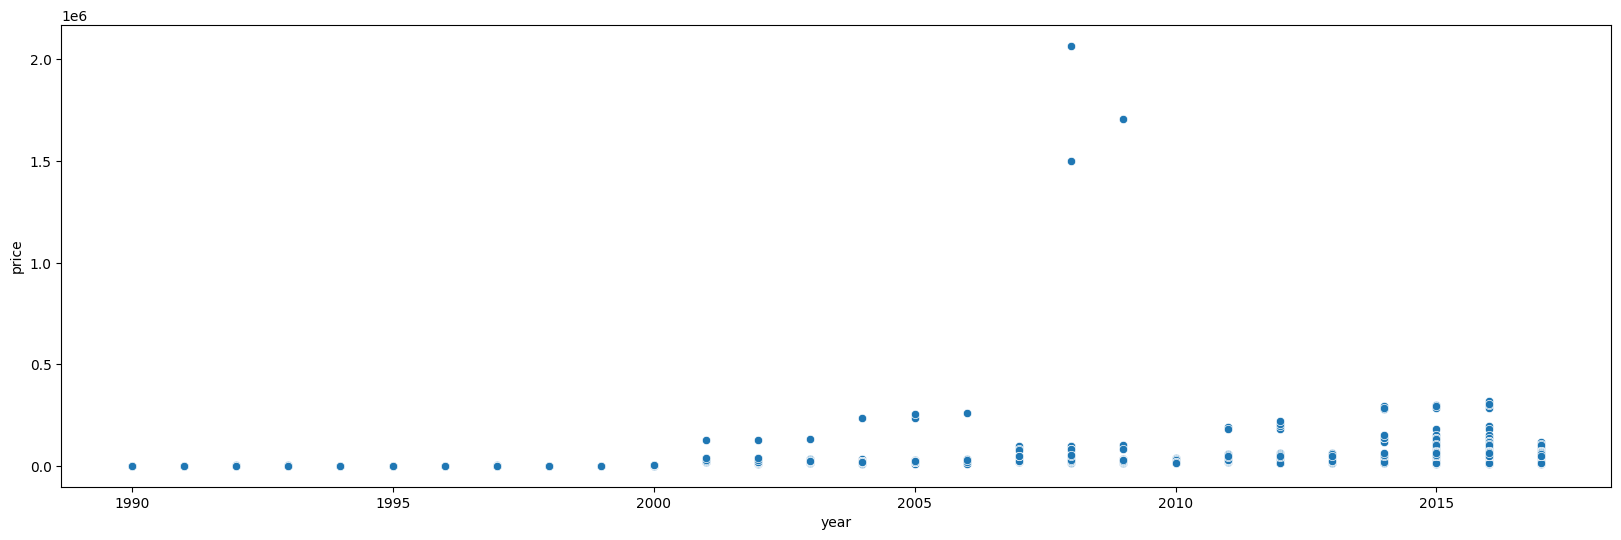

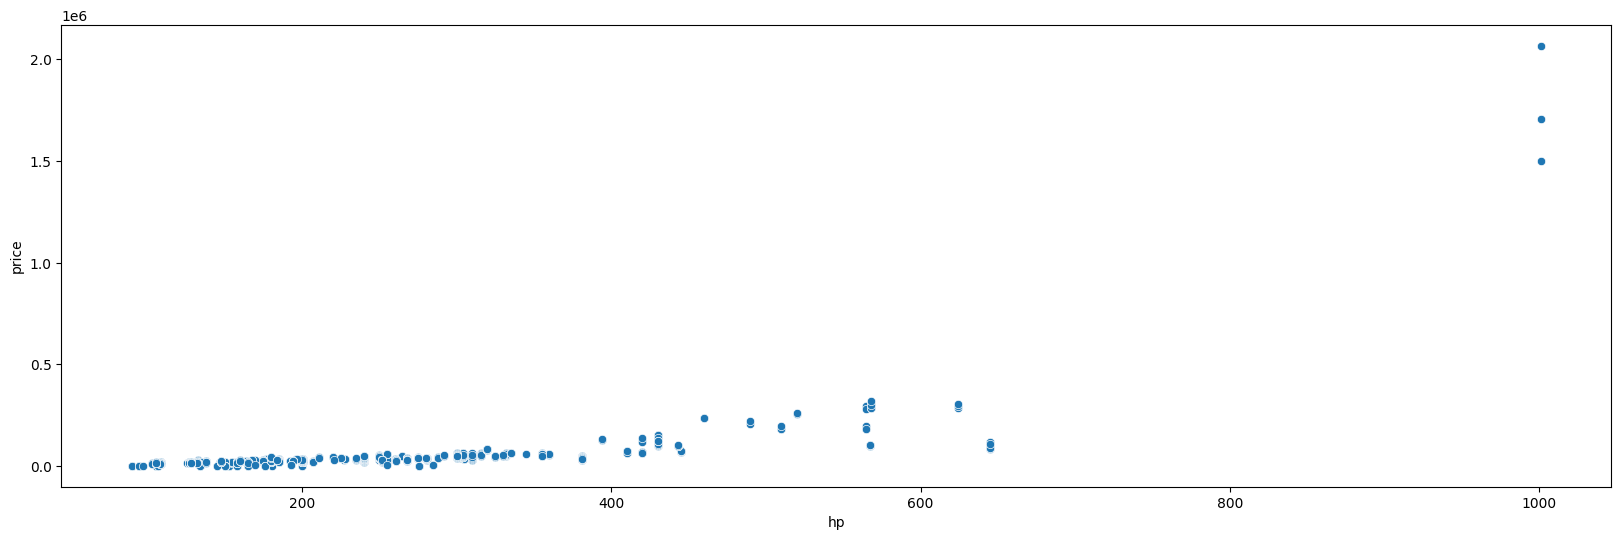

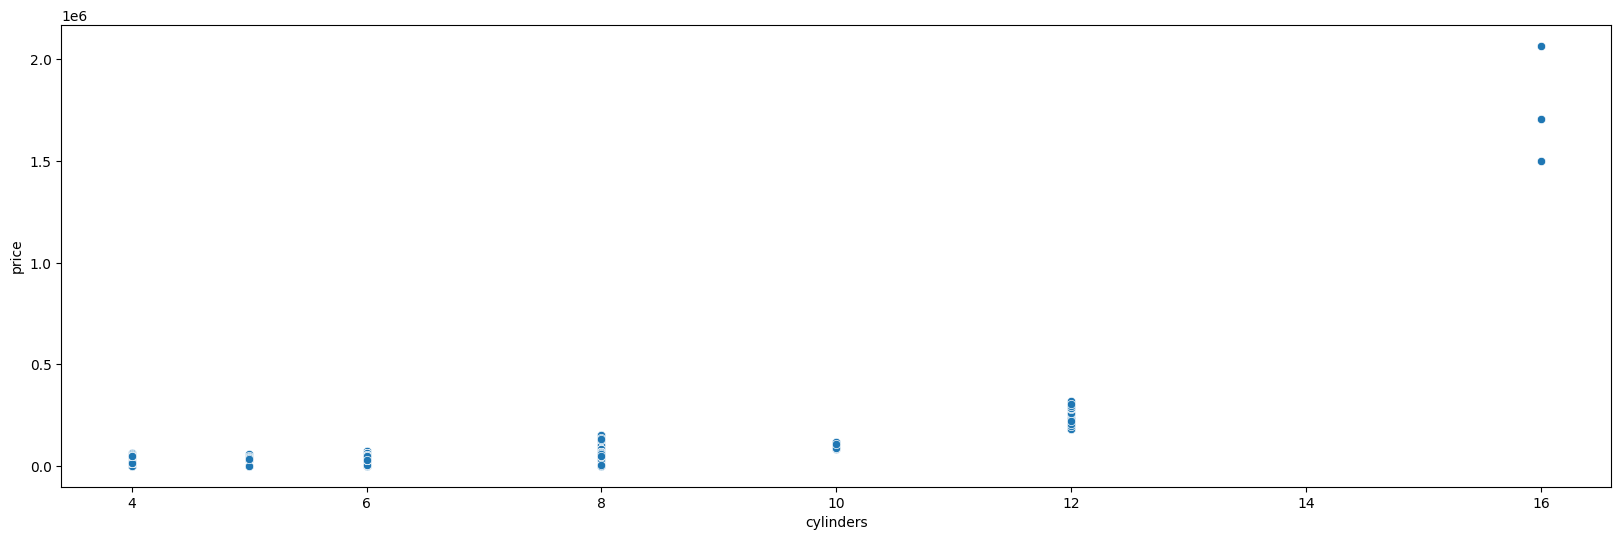

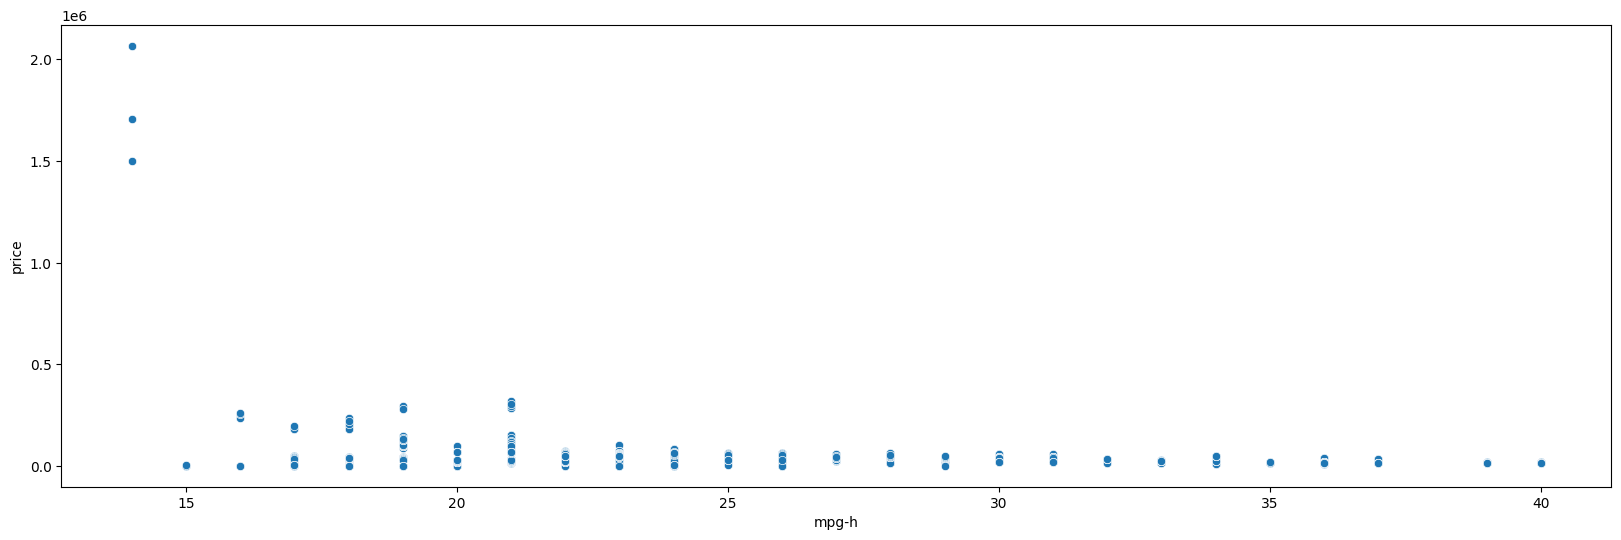

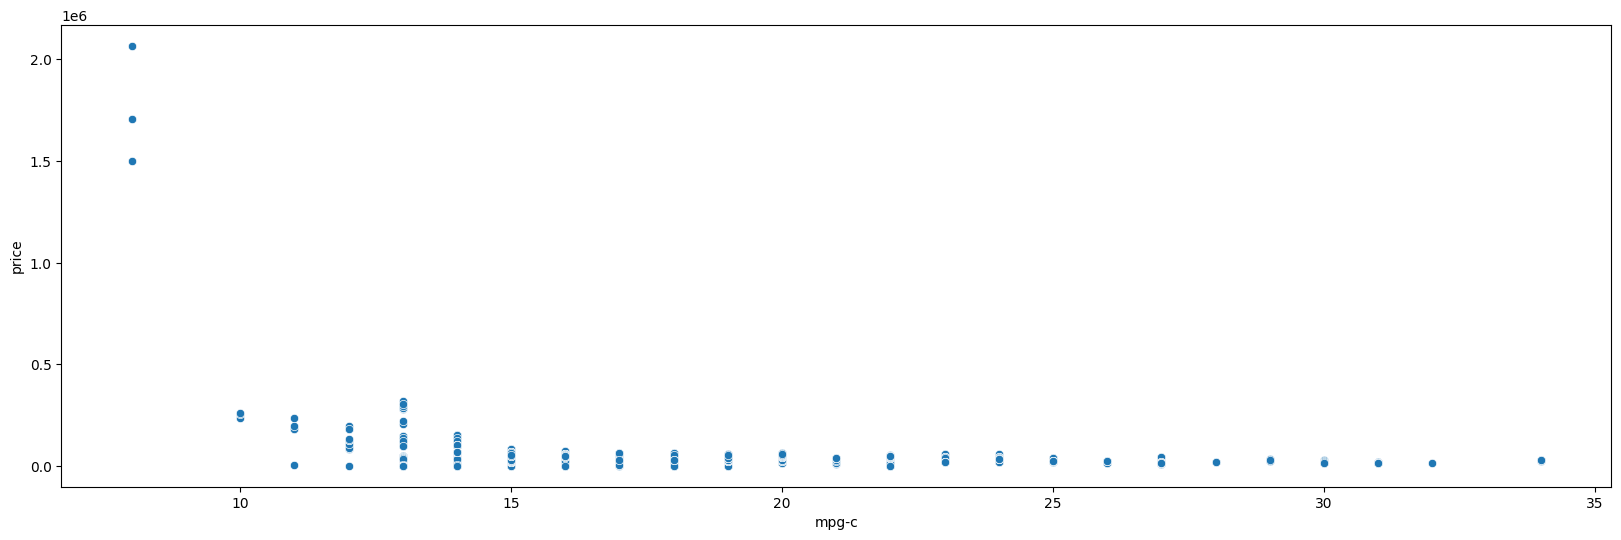

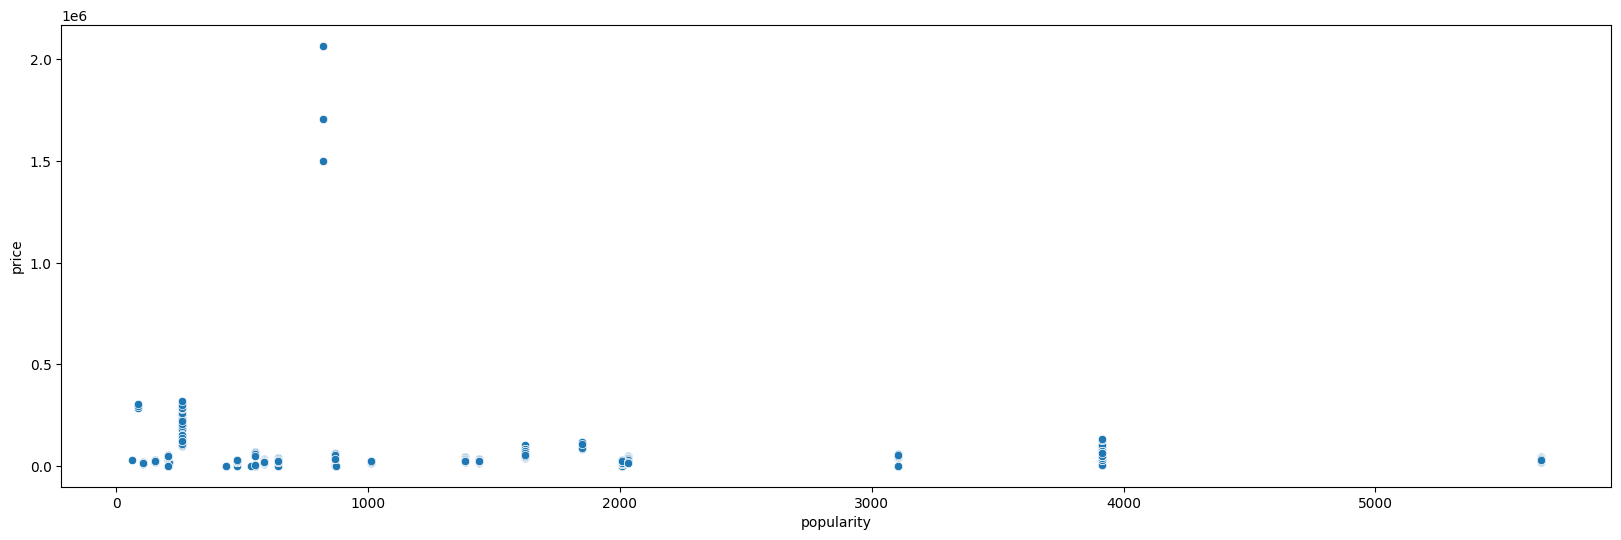

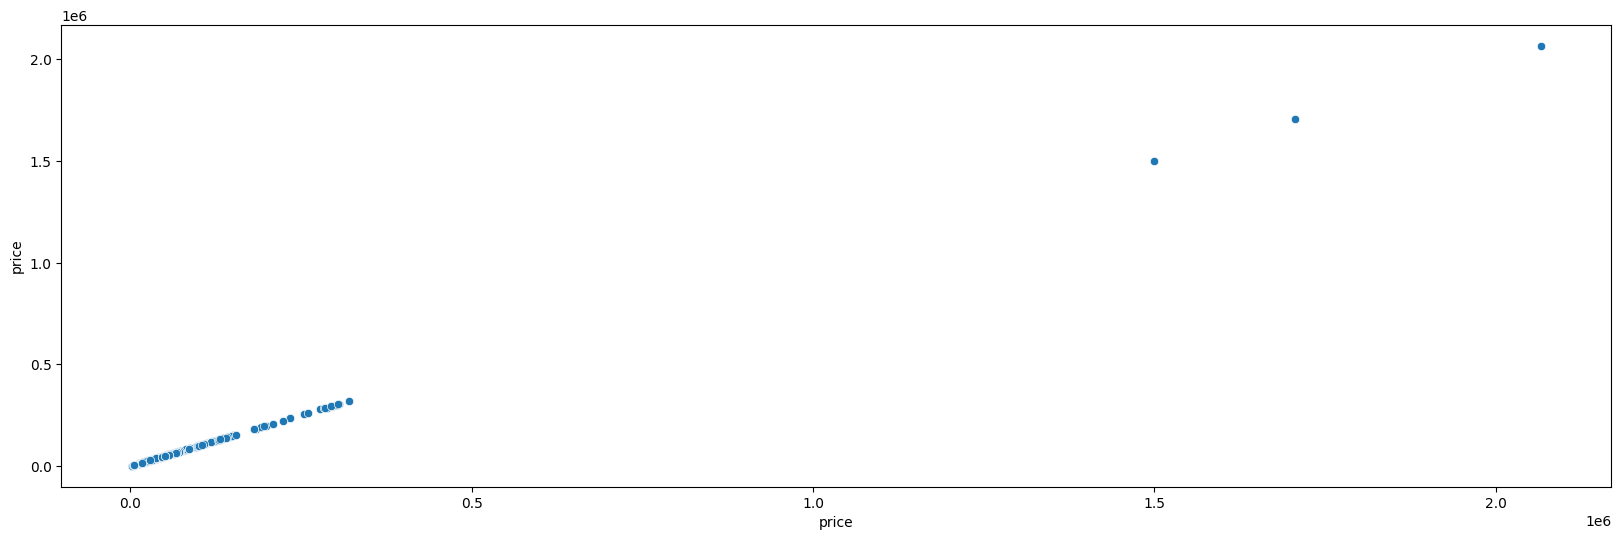

In [24]:
for col in df_numerical:
    plt.figure(figsize=(20,6))
    sns.scatterplot(x=df[col], y=df['price'])

<ipython-input-36-f8ce3971c7a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))
<ipython-input-36-f8ce3971c7a7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


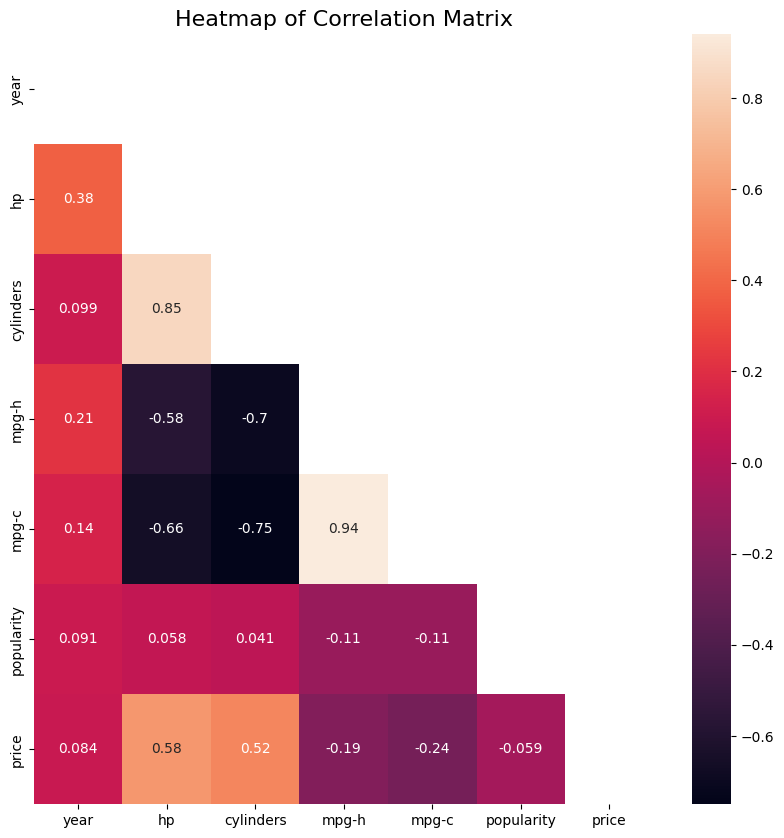

In [36]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize = (10,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, mask=mask, annot=True)
plt.title('Heatmap of Correlation Matrix',fontsize=16)
plt.show()

6. **Predictive analytics**

In [25]:
df.dtypes

make                 object
model                object
year                  int64
engine_fuel_type     object
hp                  float64
cylinders           float64
transmission         object
drive_mode           object
vehicle_size         object
vehicle_style        object
mpg-h                 int64
mpg-c                 int64
popularity            int64
price                 int64
dtype: object

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='price')
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((796, 13), (796,), (342, 13), (342,))

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))

])

In [28]:
df_categorical.columns

Index(['make', 'model', 'engine_fuel_type', 'transmission', 'drive_mode',
       'vehicle_size', 'vehicle_style'],
      dtype='object')

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [30]:
pip install xgboost

**LinearRegresi**

In [97]:
models = [
    ("LinearRegression", LinearRegression()),
]


preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ['year', 'hp', 'cylinders', 'mpg-h', 'mpg-c', 'popularity']),
    ("categoric", categorical_pipeline, ['make', 'model', 'engine_fuel_type', 'transmission', 'drive_mode',
                                          'vehicle_size', 'vehicle_style'])
])

pipeline = Pipeline([
        ("pre", preprocessor),
        ("algo", LinearRegression())
    ])
param_grid = {'algo__fit_intercept': [True, False]

}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)
best_modelLinear = grid_search.best_estimator_

In [98]:
best_score = grid_search.best_score_
best_rmse = np.sqrt(-best_score)

print(f"Best Score (Negatif MSE): {best_score:.2f}")
print(f"Best RMSE: {best_rmse:.2f}")

Best Score (Negatif MSE): -543672617.58
Best RMSE: 23316.79


**XGB.Regressor**

In [99]:
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ['year', 'hp', 'cylinders', 'mpg-h', 'mpg-c', 'popularity']),
    ("categoric", categorical_pipeline, ['make', 'model', 'engine_fuel_type', 'transmission', 'drive_mode',
                                          'vehicle_size', 'vehicle_style'])
])

pipeline = Pipeline([
        ("pre", preprocessor),
        ("algo", xgb.XGBRegressor())
    ])
param_grid = {'algo__n_estimators': [100, 200, 300],
            'algo__max_depth': [3, 5, 7]

}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)
best_modelXGB = grid_search.best_estimator_

In [100]:
best_score = grid_search.best_score_
best_rmse = np.sqrt(-best_score)

print(f"Best Score (Negatif MSE): {best_score:.2f}")
print(f"Best RMSE: {best_rmse:.2f}")

Best Score (Negatif MSE): -844013725.13
Best RMSE: 29051.91


**Decision Tree**

In [101]:
from sklearn.tree import DecisionTreeRegressor

pipeline = Pipeline([
    ("pre", preprocessor),
    ("algo", DecisionTreeRegressor())
])

param_grid = {
    'algo__max_depth': [3, 5, 7],
    'algo__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)
best_modelDecision = grid_search.best_estimator_

In [102]:
best_score = grid_search.best_score_
best_rmse = np.sqrt(-best_score)

print(f"Best Score (Negatif MSE): {best_score:.2f}")
print(f"Best RMSE: {best_rmse:.2f}")

Best Score (Negatif MSE): -540983660.26
Best RMSE: 23259.06


**Random Forest**

In [103]:
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ("pre", preprocessor),
    ("algo", RandomForestRegressor())
])

param_grid = {
    'algo__n_estimators': [100, 200, 300],
    'algo__max_depth': [3, 5, 7],
    'algo__min_samples_split': [2, 5, 10]

}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)
best_modelRandom = grid_search.best_estimator_

In [104]:
best_score = grid_search.best_score_
best_rmse = np.sqrt(-best_score)

print(f"Best Score (Negatif MSE): {best_score:.2f}")
print(f"Best RMSE: {best_rmse:.2f}")

Best Score (Negatif MSE): -628292594.56
Best RMSE: 25065.77


**Extra Tree Regressor**

In [105]:
pipeline = Pipeline([
    ("pre", preprocessor),
    ("algo", ExtraTreesRegressor())
])

param_grid = {
    'algo__n_estimators': [100, 200, 300],
    'algo__max_depth': [3, 5, 7],
    'algo__min_samples_split': [2, 5, 10]

}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)
best_modelExtra = grid_search.best_estimator_

In [106]:
best_score = grid_search.best_score_
best_rmse = np.sqrt(-best_score)

print(f"Best Score (Negatif MSE): {best_score:.2f}")
print(f"Best RMSE: {best_rmse:.2f}")

Best Score (Negatif MSE): -525946597.46
Best RMSE: 22933.53


**Bagging Regressor**

In [47]:
from sklearn.ensemble import BaggingRegressor

pipeline = Pipeline([
    ("pre", preprocessor),
    ("algo", BaggingRegressor(base_estimator=DecisionTreeRegressor()))
])

param_grid = {
    'algo__n_estimators': [100, 200, 300],
    'algo__max_samples': [0.5, 0.7, 0.9],
    'algo__max_features': [0.5, 0.7, 0.9]

}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)
best_modelBagging = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

In [48]:
best_score = grid_search.best_score_
best_rmse = np.sqrt(-best_score)

print(f"Best Score (Negatif MSE): {best_score:.2f}")
print(f"Best RMSE: {best_rmse:.2f}")

Best Score (Negatif MSE): -692536503.75
Best RMSE: 26316.09


7. **Training Data**

I will train the data with the Extra Tree Regression algorithm because best score




In [85]:
y_pred = best_modelExtra.predict(X_test)

In [86]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)

In [87]:
result.sample(19)

,make,model,year,engine_fuel_type,hp,cylinders,transmission,drive_mode,vehicle_size,vehicle_style,mpg-h,mpg-c,popularity,price,Price_actual,Price_pred
1005,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr SUV,22,15,481,28249,28249,31010.778683
644,Nissan,Versa,2017,regular unleaded,109.0,4.0,AUTOMATIC,front wheel drive,Compact,Sedan,39,31,2009,17280,17280,18869.035060
889,Volvo,XC60,2017,regular unleaded,302.0,4.0,AUTOMATIC,all wheel drive,Midsize,4dr SUV,29,20,870,51000,51000,41483.993634
458,Aston Martin,V8 Vantage,2016,premium unleaded (required),430.0,8.0,AUTOMATED_MANUAL,rear wheel drive,Compact,Convertible,21,14,259,141495,141495,139829.381250
816,BMW,X6,2016,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr SUV,24,18,3916,62900,62900,49523.568371
13,Ford,Transit Wagon,2017,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,Midsize,Passenger Van,19,14,5657,35810,35810,38641.610138
843,Volvo,XC60,2015,regular unleaded,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr SUV,24,17,870,42650,42650,41239.596457
255,Toyota,Tundra,2016,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,rear wheel drive,Large,Extended Cab Pickup,18,13,2031,30840,30840,39511.874289
1167,GMC,Yukon,2017,flex-fuel (unleaded/E85),355.0,8.0,AUTOMATIC,rear wheel drive,Large,4dr SUV,23,16,549,48530,48530,50984.275461
1176,BMW,Z3,2002,premium unleaded (required),225.0,6.0,MANUAL,rear wheel drive,Compact,2dr Hatchback,26,19,3916,37700,37700,35246.316982


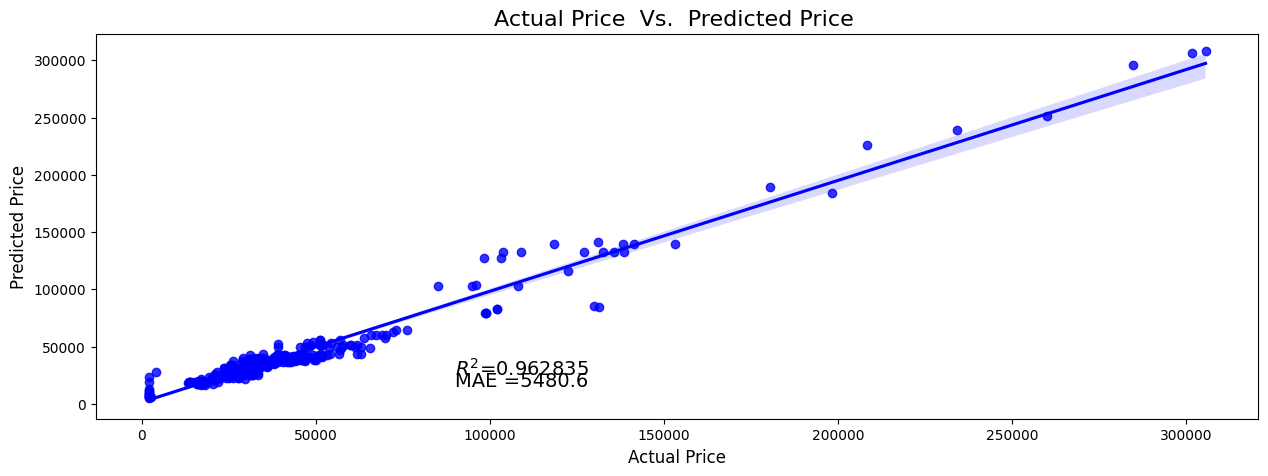

In [95]:
plt.figure(figsize=(15,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='blue')
plt.title('Actual Price  Vs.  Predicted Price ',fontsize=16)
plt.xlabel('Actual Price',fontsize=12)
plt.ylabel('Predicted Price',fontsize=12)
r_squared = round(metrics.r2_score(y_test, y_pred),6)
Mean_Absolute_Error_MAE =  round(metrics.mean_absolute_error(y_test, y_pred),1)
plt.text(90000,25000,'$ R^{2} $=' + str(r_squared),fontsize=14)
plt.text(90000,15000,'MAE =' + str(Mean_Absolute_Error_MAE),fontsize=14)
plt.show()

In [90]:
print("Accuracy on Training set: ", best_modelExtra.score(X_train, y_train))
print("Accuracy on Testing set: ", best_modelExtra.score(X_test, y_test))

Accuracy on Training set:  0.9808995142941324
Accuracy on Testing set:  0.9628346402929552


In [91]:
def predict_car_price(data):
    best_model = best_modelExtra
    columns = ['make', 'model', 'year', 'engine_fuel_type', 'hp', 'cylinders', 'transmission',
               'drive_mode', 'vehicle_size', 'vehicle_style', 'mpg-h', 'mpg-c', 'popularity']
    X_pred = pd.DataFrame([data], columns=columns)
    predicted_price = best_model.predict(X_pred)
    X_pred['Price_pred'] = predicted_price

    return X_pred

In [92]:
# To try prediction results based on manual data input
input_data = ["Toyota", "Tundra", 2017, "regular unleaded", 381.0, 6.0,
              "AUTOMATIC", "all wheel drive", "Midsize", "4dr SUV", 23, 17, 870]

predicted_data = predict_car_price(input_data)
predicted_data

,make,model,year,engine_fuel_type,hp,cylinders,transmission,drive_mode,vehicle_size,vehicle_style,mpg-h,mpg-c,popularity,Price_pred
0,Toyota,Tundra,2017,regular unleaded,381.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr SUV,23,17,870,37081.13824


# CONCLUSION


1. The independent variables that have the most influence on price are hp, cylinders, and year

2. Based on the comparison of the results of the regression model, the Extra Tree Regressor because they have lower error values compared to other models.